# TF Fundamentals

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [ ]:
# Creating tensors with tf.constant()
scalar = tf.constant(7)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [ ]:
#check the number of dimension of a tensor (ndim stands for number of dimension)
scalar.ndim

0

In [ ]:
#Create a vector
vector = tf.constant([10,10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

In [ ]:
# check the dimension of our vector
vector.ndim

1

In [ ]:
# Create a matrix (has more than 1 dimension)
matrix = tf.constant([ [10,7],
                      [7,10]])

matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 7, 10]], dtype=int32)>

In [ ]:
matrix.ndim

2

In [ ]:
# cretae another matrix
matrix_2 = tf.constant([[10.,7.],
                        [3.,2.],
                        [8.,9.]], dtype=tf.float16) #specifiy the data type
matrix_2

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[10.,  7.],
       [ 3.,  2.],
       [ 8.,  9.]], dtype=float16)>

In [ ]:
matrix_2.ndim

2

In [ ]:
# Creating a tensor
tensor = tf.constant([[[1,2,3,],
                       [4,5,6]],
                      [[7,8,9],
                       [10,11,12]],
                      [[13,14,15],
                       [16,17,18]]]) # [[0,0,0],[0,0,0]]
                                     # [[0,0,0],[0,0,0]]
                                     # [[0,0,0],[0,0,0]]
tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]], dtype=int32)>

In [ ]:
tensor.ndim

3

In [ ]:
# Scalar: Single number
# Vector: a number with direction (e.g wind speed and direction)
# Matrix: a 2-dimensional array of numbers
# Tensor: an n-dimensional array of number (when n can be any number, a 0-dimensional tensor is a scalar, a 1-dimensional tensor is a vector)

### Creating tensors with `tf.Variable`

In [ ]:
changeable_tensor = tf.Variable([10,7])
unchangeable_tensor = tf.constant([10,7])
changeable_tensor, unchangeable_tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7], dtype=int32)>)

In [ ]:
# Change on of the elements

changeable_tensor[0] = 7
changeable_tensor

TypeError: ignored

In [ ]:
# using .assign()
changeable_tensor[0].assign(7)
changeable_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([7, 7], dtype=int32)>

In [ ]:
# try to change the unchangeable tensor

unchangeable_tensor[0].assign(7)
#'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'assign'

AttributeError: ignored

### Creating random tensors
Random tensors are tensors of some arbitrary size wich contain random numbers

In [ ]:
# 2 random tensor (but the same)
random_1 = tf.random.Generator.from_seed(42) # set seed for reproducitibility
random_1 = random_1.normal(shape=(3,2))
random_2 = tf.random.Generator.from_seed(42)
random_2 = random_2.normal(shape=(3,2))

#Are they equal?
random_1, random_2, random_1 == random_2

(<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193763, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193763, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=bool, numpy=
 array([[ True,  True],
        [ True,  True],
        [ True,  True]])>)

### Shuffle the oreder of elements in the tensor

In [ ]:
# Shuffle a tensor | Valueble for when you want to shuffle your data so the inherent order does not effect learning
not_shuffle = tf.constant([[10,7],
                           [3,4],
                           [2,5]])
not_shuffle.ndim

2

In [ ]:
not_shuffle

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4],
       [ 2,  5]], dtype=int32)>

In [ ]:
#shuffle our non-shuffled tensor

tf.random.shuffle(not_shuffle)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 2,  5],
       [10,  7],
       [ 3,  4]], dtype=int32)>

In [ ]:
# it looks if we want our shuffled tensors to be in the same oreder we have got to use the global level random seed as well as the operation level random seed
tf.random.set_seed(55) #global level random seed
tf.random.shuffle(not_shuffle, seed=55) #operation level random seed

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 2,  5],
       [10,  7],
       [ 3,  4]], dtype=int32)>

### other way to make tensors

In [ ]:
#Tensor of all ones
tf.ones([10,7])


<tf.Tensor: shape=(10, 7), dtype=float32, numpy=
array([[1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.]], dtype=float32)>

In [ ]:
#Tensor of all zeros
tf.zeros(shape=(3,4))

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

### Turn Numpy arrays into tensors
The main difference between Numpy arrays and Tensorflow tensors is that tensors can be run on a GPU computing

In [ ]:
# Turn Numpy arrays into tensors
import numpy as np
numpy_A = np.arange(1,25,dtype=np.int32) #numpy Arrays
numpy_A

#X = tf.constant(some_matrix)  #capital letter for matrix or tensor
#y = tf.constant(vector) #non-capital letter for vector

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)

In [ ]:
#Convert numpy to tensor
A = tf.constant(numpy_A, shape=(3,8))
B = tf.constant(numpy_A)
A,B

(<tf.Tensor: shape=(3, 8), dtype=int32, numpy=
 array([[ 1,  2,  3,  4,  5,  6,  7,  8],
        [ 9, 10, 11, 12, 13, 14, 15, 16],
        [17, 18, 19, 20, 21, 22, 23, 24]], dtype=int32)>,
 <tf.Tensor: shape=(24,), dtype=int32, numpy=
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24], dtype=int32)>)

In [ ]:
A.ndim

2

### Getting information from Tensors
* Shape
* Rank
* axis or dimension
* Size

In [ ]:
# create a rank 4 tensor (4 dimensions)
rank_4_tensor = tf.zeros(shape=[2,3,4,5])
rank_4_tensor


<tf.Tensor: shape=(2, 3, 4, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]], dtype=float32)>

In [ ]:
rank_4_tensor[0]

<tf.Tensor: shape=(3, 4, 5), dtype=float32, numpy=
array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]], dtype=float32)>

In [ ]:
rank_4_tensor.shape, rank_4_tensor.ndim, tf.size(rank_4_tensor)
#size 120 # because 2*3*4*5

(TensorShape([2, 3, 4, 5]), 4, <tf.Tensor: shape=(), dtype=int32, numpy=120>)

In [ ]:
#Get various attributes of our tensor

print("Datatype of every element:", rank_4_tensor.dtype)
print("Number of dimensions (rank):", rank_4_tensor.ndim)
print("Shape of tensor:", rank_4_tensor.shape)
print("Element along the 0 axis:", rank_4_tensor.shape[0])
print("Element along the last axis:", rank_4_tensor.shape[-1])
print("Total number of elements in our tensor:", tf.size(rank_4_tensor) )
print("Total number of elements in our tensor:", tf.size(rank_4_tensor).numpy() )

Datatype of every element: <dtype: 'float32'>
Number of dimensions (rank): 4
Shape of tensor: (2, 3, 4, 5)
Element along the 0 axis: 2
Element along the last axis: 5
Total number of elements in our tensor: tf.Tensor(120, shape=(), dtype=int32)
Total number of elements in our tensor: 120


### Indexing and expanding tensors
Tesor can be index just like python list

In [ ]:
#Get the first 2 elements of each dimension
rank_4_tensor[:2,:2,:2,:2]

<tf.Tensor: shape=(2, 2, 2, 2), dtype=float32, numpy=
array([[[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]]], dtype=float32)>

In [ ]:
# Get the first element from each dimension from each index ecept for the final one

rank_4_tensor[:1,:1,:1,:]

<tf.Tensor: shape=(1, 1, 1, 5), dtype=float32, numpy=array([[[[0., 0., 0., 0., 0.]]]], dtype=float32)>

In [ ]:
# create a rank 2 tensor (2 dimensions)
rank_2_tensor = tf.constant([[10,7],
                            [3,4]])

rank_2_tensor.shape, rank_2_tensor.ndim

(TensorShape([2, 2]), 2)

In [ ]:
# Get the las item of each row of our rank 2 tensor
rank_2_tensor[:,-1]

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([7, 4], dtype=int32)>

In [ ]:
# Add in extra dimension
rank_3_tensor = rank_2_tensor[..., tf.newaxis]
rank_3_tensor

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 7]],

       [[ 3],
        [ 4]]], dtype=int32)>

In [ ]:
# Alternative to tf.newaxis
tf.expand_dims(rank_2_tensor, axis=-1) #-1 is to put the new axis at the end

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 7]],

       [[ 3],
        [ 4]]], dtype=int32)>

In [ ]:
tf.expand_dims(rank_2_tensor, axis=0)

<tf.Tensor: shape=(1, 2, 2), dtype=int32, numpy=
array([[[10,  7],
        [ 3,  4]]], dtype=int32)>

### Manipulating tensors

**Basic Operations**

`+`,`-`,`*`

In [ ]:
#Add values to a tensor using the addtion operator

tensor = tf.constant([[10,7],
                      [3,4]])
tensor + 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 17],
       [13, 14]], dtype=int32)>

In [ ]:
#Original tensor is unchanged

tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4]], dtype=int32)>

In [ ]:
#Multiplication also works
tensor *10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 30,  40]], dtype=int32)>

In [ ]:
# Substraction works

tensor - 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 0, -3],
       [-7, -6]], dtype=int32)>

In [ ]:
# Use the tensorflow buitl-in function too
tf.multiply(tensor,10)
tf.add(tensor, 10)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 17],
       [13, 14]], dtype=int32)>

**Matrix multiplication**

In machine learning, matrix multiplication is one of the most common tensor operations

There 2 rules our tensors (or matrices) need to fulfill if we are going to matrix multiply them:

1. The inner dimensions must match 3x**3** - **3**x2
2. The resulting matrix has the shape of the outer dimensions **3**x2 - 3x**2**

In [ ]:
#from IPython.display import Image
#Image("/content/drive/MyDrive/IMG_0938.png")

In [ ]:
#Matrix multiplication in TF

tf.matmul(tensor, tensor)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]], dtype=int32)>

In [ ]:
#Matrix multiplication with Python operator "@"

tensor @ tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]], dtype=int32)>

In [ ]:
# Createa tensor (3,2) 
X = tf.constant([[1,2],
                 [3,3],
                 [5,6]])

Y = tf.constant([[7,8],
                 [9,10],
                 [11,12]])

X,Y

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 3],
        [5, 6]], dtype=int32)>, <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 7,  8],
        [ 9, 10],
        [11, 12]], dtype=int32)>)

In [ ]:
# Matrix multiply tensors of same shape
tf.matmul(X,Y) # gives error

InvalidArgumentError: ignored

In [ ]:
# Lets change the shape of Y
tf.reshape(Y, shape=(2,3))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[ 7,  8,  9],
       [10, 11, 12]], dtype=int32)>

In [ ]:
# Try to multiply X by reshape Y
X @ tf.reshape(Y,shape=(2,3))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 51,  57,  63],
       [ 95, 106, 117]], dtype=int32)>

In [ ]:
tf.matmul(X,tf.reshape(Y,shape=(2,3)))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 51,  57,  63],
       [ 95, 106, 117]], dtype=int32)>

In [ ]:
# Try change the shape of X instead of Y
tf.matmul(tf.reshape(X,shape=(2,3)),Y)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 58,  64],
       [132, 146]], dtype=int32)>

In [ ]:
# Can do the same with transpose
X,tf.transpose(X), tf.reshape(X,shape=(2,3))

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 3],
        [5, 6]], dtype=int32)>, <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[1, 3, 5],
        [2, 3, 6]], dtype=int32)>, <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[1, 2, 3],
        [3, 5, 6]], dtype=int32)>)

In [ ]:
# Matriz multiplication with transpose rather than reshape

tf.matmul(tf.transpose(X),Y)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [107, 118]], dtype=int32)>

**The dot product**

Matrix multiplication is also refferred to as the dot product.

You can perform matrix multiplication using:

* `tf.matmul()`
* `tf.tensordot()`

In [ ]:
# Perform the dot product on X and Y (requires X or Y to be transposed)

tf.tensordot(tf.transpose(X),Y,axes=1)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [107, 118]], dtype=int32)>

In [ ]:
# Perform matrix multiplication between X and Y (transposed)
tf.matmul(X, tf.transpose(Y))


<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 23,  29,  35],
       [ 45,  57,  69],
       [ 83, 105, 127]], dtype=int32)>

In [ ]:
# Perform matrix multiplication between X and Y (reshaped)
tf.matmul(X, tf.reshape(Y,shape=(2,3)))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 51,  57,  63],
       [ 95, 106, 117]], dtype=int32)>

In [ ]:
# Check the values of Y, reshape Y and transposed Y
print("Normal Y:")
print(Y, "\n")


print("Y reshaped to (2,3):")
print(tf.reshape(Y, shape=(2,3)),"\n")

print("Y transposed:")
print(tf.transpose(Y))

Normal Y:
tf.Tensor(
[[ 7  8]
 [ 9 10]
 [11 12]], shape=(3, 2), dtype=int32) 

Y reshaped to (2,3):
tf.Tensor(
[[ 7  8  9]
 [10 11 12]], shape=(2, 3), dtype=int32) 

Y transposed:
tf.Tensor(
[[ 7  9 11]
 [ 8 10 12]], shape=(2, 3), dtype=int32)


In [ ]:
tf.matmul(X, tf.transpose(Y))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 23,  29,  35],
       [ 45,  57,  69],
       [ 83, 105, 127]], dtype=int32)>

Generally when performing matrix multiplication on two tensors,
and one of the axes does not line up,
you will transpose (rather tahn reshape) on of
the tensors to satisfy the matrix multiplication
rules.


### Changing the data type of a tensor

In [ ]:
# Create a tensor with a default dadatype float32
B = tf.constant([1.7,7.4])
B.dtype

tf.float32

In [ ]:
C = tf.constant([7,10])
C.dtype

tf.int32

In [ ]:
# change tp float32 to float16
B = tf.cast(B, dtype=tf.float16)
B

<tf.Tensor: shape=(2,), dtype=float16, numpy=array([1.7, 7.4], dtype=float16)>

In [ ]:
# Change from int32 to fload32
E = tf.cast(B, dtype=tf.float32)
E

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1.7001953, 7.3984375], dtype=float32)>

In [ ]:
E_float16 = tf.cast(E, dtype=tf.float16)
E_float16

<tf.Tensor: shape=(2,), dtype=float16, numpy=array([1.7, 7.4], dtype=float16)>

### Aggregating tensors

Aggregating tensors = condensing them to multiple values down to a smaller amount of values

In [ ]:
# Get the absolute values

D = tf.constant([[-7,-10]])
tf.abs(D)

<tf.Tensor: shape=(1, 2), dtype=int32, numpy=array([[ 7, 10]], dtype=int32)>

Lets go through the following forms of aggregation:
* Get the minimun
* Get the maximun
* Get the mean of a tensor
* Get the sum of a tensor

In [ ]:
# Creating a random tensor width values between 0 and 100 of size 50
E = tf.constant(np.random.randint(0,100,size=50))
E



<tf.Tensor: shape=(50,), dtype=int64, numpy=
array([16, 20, 51, 95, 95,  5, 94, 77, 76, 82, 66, 14, 86, 26, 56, 14, 60,
        0, 85, 32, 98, 79, 87, 77, 50, 74, 36, 24, 20, 78,  8, 63, 43, 29,
       73, 17, 44, 37, 69, 42, 91, 36, 76, 22, 50, 97, 50, 55, 73, 19])>

In [ ]:
tf.size(E), E.shape, E.ndim

(<tf.Tensor: shape=(), dtype=int32, numpy=50>, TensorShape([50]), 1)

In [ ]:
#Find the minimun
tf.reduce_min(E)

<tf.Tensor: shape=(), dtype=int64, numpy=0>

In [ ]:
# Find the maximn
tf.reduce_max(E)

<tf.Tensor: shape=(), dtype=int64, numpy=98>

In [ ]:
#Find the mean
tf.reduce_mean(E)

<tf.Tensor: shape=(), dtype=int64, numpy=53>

In [ ]:
#Find the sum
tf.reduce_sum(E)

<tf.Tensor: shape=(), dtype=int64, numpy=2667>

In [ ]:
#Find the variance
import tensorflow_probability as tfp
tfp.stats.variance(E)

<tf.Tensor: shape=(), dtype=int64, numpy=819>

In [ ]:
# Find the standard deviation
tf.math.reduce_std(tf.cast(E,dtype=tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=28.6186>

### Find the positional maximun and minimun



In [ ]:
# Create a new tensor for finding positional mimun and maximun
tf.random.set_seed(42)
F = tf.random.uniform(shape=[50])
F

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
       0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
       0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
       0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
       0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
       0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
       0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
       0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
       0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
       0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
      dtype=float32)>

In [ ]:
#Find the positional max
tf.argmax(F)

<tf.Tensor: shape=(), dtype=int64, numpy=42>

In [ ]:
# Find on our largest value positional
F[tf.argmax(F)]


<tf.Tensor: shape=(), dtype=float32, numpy=0.9671384>

In [ ]:
#Find the max value of F
tf.reduce_max(F)

<tf.Tensor: shape=(), dtype=float32, numpy=0.9671384>

In [ ]:
# Check for equality
F[tf.argmax(F)] == tf.reduce_max(F)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [ ]:
#Find the positional minimun
tf.argmin(F)

<tf.Tensor: shape=(), dtype=int64, numpy=16>

In [ ]:
#Find the miminun using the positional minimun index
F[tf.argmin(F)]

<tf.Tensor: shape=(), dtype=float32, numpy=0.009463668>

### Squeezing a tensor (removin all single dimensions)

In [ ]:
tf.random.set_seed(42)
G = tf.constant(tf.random.uniform(shape=[50]), shape=(1,1,1,1,50))
G

<tf.Tensor: shape=(1, 1, 1, 1, 50), dtype=float32, numpy=
array([[[[[0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
           0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
           0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
           0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
           0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
           0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
           0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
           0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
           0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
           0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043]]]]],
      dtype=float32)>

In [ ]:
G.shape

TensorShape([1, 1, 1, 1, 50])

In [ ]:
G_squeezed = tf.squeeze(G)
G_squeezed, G_squeezed.shape

(<tf.Tensor: shape=(50,), dtype=float32, numpy=
 array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
        0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
        0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
        0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
        0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
        0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
        0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
        0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
        0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
        0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
       dtype=float32)>, TensorShape([50]))

### One-Hot enconding Tensors

In [ ]:
# Create a list of indices
some_list = [0,1,2,3] 

#One hot encode our list of indices
tf.one_hot(some_list, depth=4)

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)>

In [ ]:
# Specific custom values for one-hot  encoding
tf.one_hot(some_list,depth=4,on_value="AA",off_value="ZZ")

<tf.Tensor: shape=(4, 4), dtype=string, numpy=
array([[b'AA', b'ZZ', b'ZZ', b'ZZ'],
       [b'ZZ', b'AA', b'ZZ', b'ZZ'],
       [b'ZZ', b'ZZ', b'AA', b'ZZ'],
       [b'ZZ', b'ZZ', b'ZZ', b'AA']], dtype=object)>

### Squaring, log, square root

In [ ]:
# Create a new twnsor
H = tf.range(1,10)
H

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>

In [ ]:
# Square it
tf.square(H)

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([ 1,  4,  9, 16, 25, 36, 49, 64, 81], dtype=int32)>

In [ ]:
# Find the square root (will error, method requires non-int type)
tf.sqrt(H)

In [ ]:
#Find the square root

tf.sqrt(tf.cast(H, dtype=tf.float32))

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([0.99999994, 1.4142134 , 1.7320508 , 1.9999999 , 2.236068  ,
       2.4494896 , 2.6457512 , 2.8284268 , 3.        ], dtype=float32)>

In [ ]:
#Find the log

tf.math.log(tf.cast(H, dtype=tf.float32))

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([0.       , 0.6931472, 1.0986123, 1.3862944, 1.609438 , 1.7917595,
       1.9459102, 2.0794415, 2.1972246], dtype=float32)>

### Tensors & Numpy

Tensors flow interacts beautifully with numpy arrays

In [ ]:
# Create a tensor directly from a Numpy array

J = tf.constant(np.array([3.,7.,10.]) )

J

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 3.,  7., 10.])>

In [ ]:
#Convert our tensor back to numpy array

np.array(J), type(np.array(J))

(array([ 3.,  7., 10.]), numpy.ndarray)

In [ ]:
# Convert tensor J to a Numpy array

J.numpy(), type(J.numpy())

(array([ 3.,  7., 10.]), numpy.ndarray)

In [ ]:
J = tf.constant([3.])
J.numpy()[0]

3.0

In [ ]:
# Default type of each are aslighty different
numpy_J = tf.constant(np.array([3.,7.,10.]))
tensor_J = tf.constant([3.,7.,10.])

# Check the datatypes of each

numpy_J.dtype, tensor_J.dtype 

(tf.float64, tf.float32)

### Finding access to GPUs

In [ ]:
tf.config.list_logical_devices()

[LogicalDevice(name='/device:CPU:0', device_type='CPU')]

In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



### If you have access to a CUDA-enabled GPU, Tensorflow will automatically use it whenever possible

# Neural Network Regression with TensorFlow

### Introduction to regression with neural netwroks in TF

There are many definitions for a regression problema but in pur case, ew're going to simplify it: prediction a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [ ]:
# Import TF
import tensorflow as tf


## Creating some data to view and fit

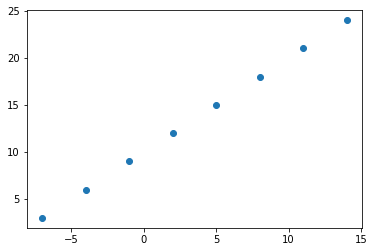

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

#Create features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

#Create labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

#Visualize it
plt.scatter(X,y)

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [ ]:
# Create a demo tensor for our housing price predictiong problem
house_info = tf.constant(["Bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'Bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0],y[0]

(-7.0, 3.0)

In [ ]:
X[1],y[1]

(-4.0, 6.0)

In [ ]:
input_shape = X.shape
output_shape = y.shape

input_shape, output_shape


((8,), (8,))

In [ ]:
#Turn our Numpy arrays into tensors

X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

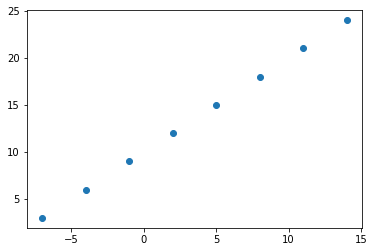

In [ ]:
plt.scatter(X,y)

## Steps in modelling with TensorFlow
1. **Creating a model** - Define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - Define the loss function (in other words, the function which tells our model how wrong it is) and the optimizaer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - Letting the model try to find patterns between X & y (features and labels).

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # MAE is short for Mean Absolute Error
              optimizer=tf.keras.optimizers.SGD(), #SGD is short for Stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1),y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 498ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 22ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 22ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
# Check out X and y
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Try and make a prediction using our model
model.predict([17.0])

array([[12.716021]], dtype=float32)

## Improving our model
We can improve our model, by altering the steps we took to create a model.
1. **Creating a model** - Here we might add more layers, increase the number of hidden units (all called neuron) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - Here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting the model** - Here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [ ]:
from logging import logProcesses
# Lets rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"]
)

# 3. Fit the model (this time we will train for longer)
model.fit(tf.expand_dims(X, axis=-1),y, epochs=2000)

In [ ]:
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Lets predict

model.predict([17.0])

array([[27.359833]], dtype=float32)

In [ ]:
# Another chnges to improve the model

# 1 create the model with an extra hidden layer

model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model

model.compile(loss="mae",
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001), #agregar el learning rate mejoro la prediccion
              metrics=["mae"])

# 3. Fit the model

model.fit(tf.expand_dims(X, axis=-1),y, epochs=200)



In [ ]:
# Lets predict

model.predict([25.0])

array([[37.61111]], dtype=float32)

## Evaluating a Model

In practice, a typical workflow you will go through when building a neural networks is:

```
Building a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it... and so on
```

When it comes to evaluation... there are 3 words you should memorize:
> "Visualize, Visualize, Visualize"

It's good idea to visualize:
* **The data** - What data are we working with? Whats does it look like?
* **The model itself** - What dows our model look like?
* **The training of a model** - How does a model perform while it learns?
* **The predictions of the model** - How do the predictions of a model line up against the ground truth (the original labels)?

In [ ]:
# Make a bigger dataset

X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

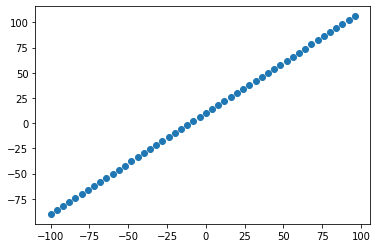

In [ ]:
# Visualize the data

import matplotlib.pyplot as plt

plt.scatter(X,y)


### The 3 sets...

* **Training set** - The model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation Set** - The model gets tuned on this data, which is typically 10-15% of the data available.
* **Test Set** -  The model gest evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available.



In [ ]:
# Check the length of how many samples we have
len(X)

50

In [ ]:
# Splot the data into train and test sets

X_train = X[:40] # First 40 are training samples (80% of the data)
y_train = y[:40]


X_test = X[40:] # The last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data
Now we have got our data in training and test sets... lets visualize it again!

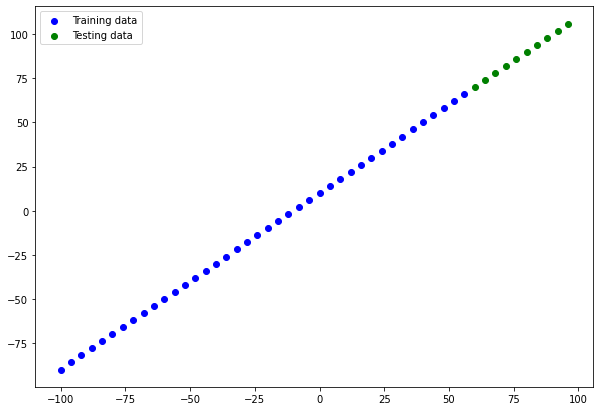

In [ ]:
plt.figure(figsize=(10,7))

#Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")

# Plot test data in green 
plt.scatter(X_test, y_test, c= "g", label="Testing data")

# Show legend
plt.legend();

In [ ]:
# Lets have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)                             
])

# 2. Compile the model

model.compile(loss=["mae"],
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X_train, axis=-1),y_train, epochs=100)

## Visualizing the model

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Lets create a model wich builds automatically by defining the input_shape argument in the first layer

tf.random.set_seed(42)

# 1. Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10,input_shape=[1], name="input_layer"),
  tf.keras.layers.Dense(1, name="output_layer")                             
], name="Model_Name")


# 2. Compile the model

model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:
model.summary()

Model: "Model_Name"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* **Total params** - Total number of parameters in the model.
* **Trainablle paramters** - These are the parameters (patterns) the model can update as it trains.
* **Non-Trainable params** _ These are the parameters are not updated during training (this is typical when you bring in alreadu learn patterns or paraemters from other models during **transfer learning**)

**Resource:** For a more in-depth overview of the trainable paramters within a layer, check out MITs introduction to deep learning video.

In [ ]:
# 3. Fit the model
model.fit(tf.expand_dims(X_train, axis=-1),y_train, epochs=100, verbose=1) #verbose is to show or not the results

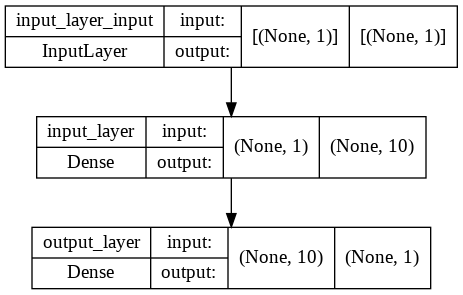

In [ ]:
#Visualizing the model

from tensorflow.keras.utils import plot_model

plot_model(model,show_shapes=True)

## Visualizing Model's prediction

To visualize preidctions, its a good idea to plot them against the ground truth labels. 
Often you will see this in the form of `y_test` or `y_true` versus `y_pred` (groundtruth versus model's predictions)

In [ ]:
# Make some predictions

y_pred = model.predict(X_test)
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [ ]:
y_test, X_test

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>)

In [ ]:
#Lets create a plotting function

def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth lables.
  """
  plt.figure(figsize=(10,7))

  #Plot training data in blue
  plt.scatter(train_data,train_labels,c="b",label="Training data")

  #Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")

  #Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label = "Predictions")

  # Show the legend
  plt.legend();



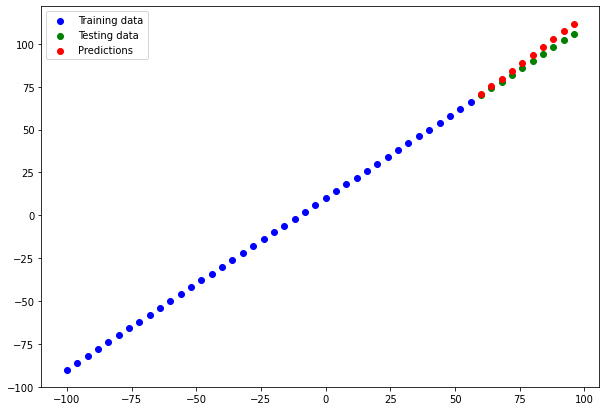

In [ ]:
plot_predictions()

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be a different evaluation metrics to evaluate your model's performance.

Since we are working on a regression, two of the main metrics:
* **MAE** - Mean absolute error, "on average, how wrong is each of my model's predictions"
* **MSE** - Mean square error, "square the average errors"

In [ ]:
# Evaluate the model on the test data
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 328ms/step - loss: 3.1969 - mae: 3.1969


[3.196942090988159, 3.196942090988159]

In [ ]:
# Calculate the mean absolute error

mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558258 , 14.1160555, 11.708948 , 10.336929 , 10.       ,
       10.698161 , 12.447118 , 15.333002 , 19.253975 , 23.841698 ],
      dtype=float32)>

In [ ]:
# Calculate the mean absolute error

mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))

mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>

In [ ]:
# Calculate the mean square error

mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))

mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070143>

In [ ]:
# Make some functions to reuse MAE y MSE
def mae(y_true,y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred))
  
def mse(y_true,y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred))

### Running experiments to improve the model

1. Get more data - get more exmaples for your model to train on (more opportunities to learn patterns or relationships between features and labels)
2. Make your model larger (using amore complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 experiments:

1. `model_1` -  same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs



**Build** `model_1`

In [ ]:
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)                      
],name="model_1")

# 2. Compile the model
model_1.compile(loss=["mae"],
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model

model_1.fit(tf.expand_dims(X_train, axis=-1),y_train, epochs=100, verbose=0)

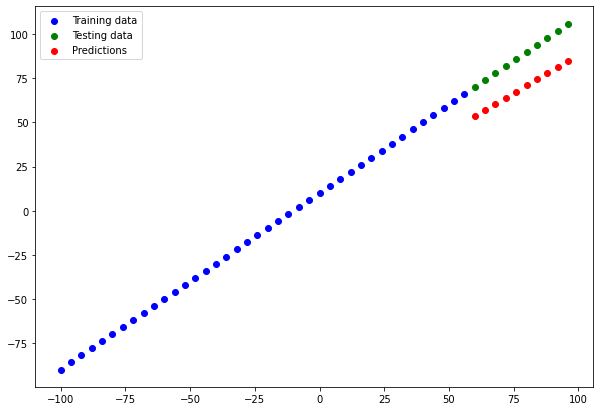

In [ ]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
#Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)

mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

**Build** `model_2`

* 2 dense layers, trained for 100 epochs

In [ ]:
#Set the random
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)                               
])

# 2. Compile the model
model_2.compile(loss=["mae"],
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit the model

model_2.fit(tf.expand_dims(X_train, axis=-1),y_train, epochs=100, verbose=1)

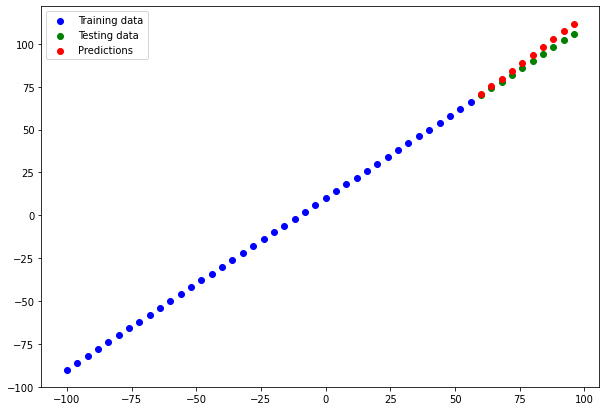

In [ ]:
# Make and plot predictions of model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
# Calculate model_2 evaluation metrics

mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test,y_preds_2)

mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070143>)

**Build `model_3`**

* 2 Layers, trained for 500 epochs

In [ ]:
# Set random seed
tf.random.set_seed(42)


# 1. Create a model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)                               
])

# 2. Compile the model

model_3.compile(loss=["mae"],
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model

model_3.fit(tf.expand_dims(X_train, axis=-1),y_train, epochs=500, verbose=1)


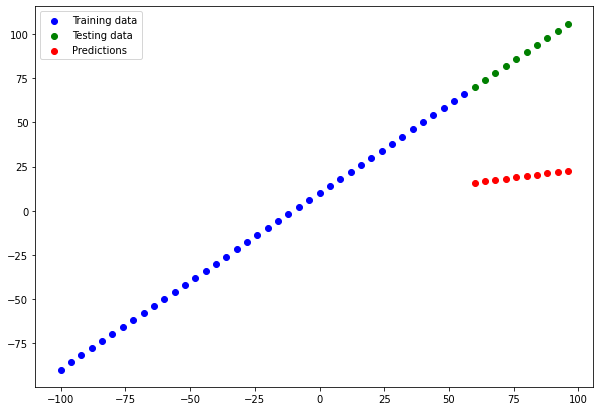

In [ ]:
# Make and plot some predictions

y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
# calculate model_3 evaluation metrics

mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)

## Comparing the results of our experiments

We've run a few experiments, let's compare the results.

In [ ]:
# Lets compare our model's results using a pandas Dataframe

import pandas as pd

model_results = [["model_1",mae_1.numpy(), mse_1.numpy()],
                 ["model_2",mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(),mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196941,13.070143
2,model_3,68.713615,4808.027344


Looks like `model_2` performed the best....

In [ ]:
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


> **Note:** One of your main goals should be to minimize the time between your experiments. The more expermients you do, the more things you will figure out wich out dont work and in turn, get close to figuring out what does work. Remember the machine learning praticioner's motto: "experiment, experiment, experiment"

## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you are running a lots of expermients.

Luckily, there are tools to help us!

**Resource:** As you build more models, you will want to look into using:

* Tensorboard -ma component of the Tensorflow library to hel track modelling experiments.
* Weights & Biases - a tool for tracking all of kinds of machine learning experiments (plus straight into TensorBoard)

## Saving our models

There 2 fmain formats we can seva our models:
* **The SavedModel** format
* **The HDF5** format

In [ ]:
# Save model using the SavedModel format

model_2.save("model_SavedModel_format")

INFO:tensorflow:Assets written to: model_SavedModel_format/assets


In [ ]:
# Save model using HDF5 format

model_2.save("model_2.h5")

## Loading in a saved model

In [ ]:
# Load in the SavedModel format model

loaded_SavedModel_format = tf.keras.models.load_model("model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Compare model_2 predictions versus loaded model

model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)

model_2_preds == loaded_SavedModel_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("model_2.h5")
loaded_h5_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)

model_2_preds == loaded_h5_model_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model from Google Colab

In [ ]:
#Download a file

from google.colab import files

files.download("/content/model_2.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Download file to google drive
!cp "/content/model_2.h5" "/content/drive/MyDrive"

In [ ]:
!ls "/content/drive/MyDrive"

## A larger example

In [ ]:
# Import libraries

import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Reada dataset

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# One hot encode the dataframe to have all columns in number format
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Create X, y values (features and labels)

X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [ ]:
#View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
# Create training and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
len(X),len(X_train),len(X_test)

(1338, 1070, 268)

In [ ]:
# Build a neural network

tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)                                       
])

# 2. Compile model
insurance_model.compile(loss=["mae"],
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)


In [ ]:
# Check the results of model on the test data
insurance_model.evaluate(X_test,y_test) #7023.3291 representa lo distanciado que esta del valor real

9/9 [==============================] - 0s 3ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [ ]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364489)

## Right now it looks like our model isnt performing too well... let's try a nd improve it

To try improve our model, we will run 2 experiments:
1. Add an extra layer with more hidden units and use ADAM optimizer
2. Train for longer
3. (insert your own experiment here)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model

insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)                                         
])


# 2.Compile the model
insurance_model_2.compile(loss=["mae"],
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model

insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)


In [ ]:
# Evaluate the larger model

insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 4924.3477 - mae: 4924.3477


[4924.34765625, 4924.34765625]

In [ ]:
# Set random seed
tf.random.set_seed(42)


# 1 Create the model
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)                                         
])


#2. Compile the model
insurance_model_3.compile(loss=["mae"],
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])


# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200)


In [ ]:
# Evaluate out 3rd Model

insurance_model_3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3491.2961 - mae: 3491.2961


[3491.296142578125, 3491.296142578125]

Text(0.5, 0, 'epochs')

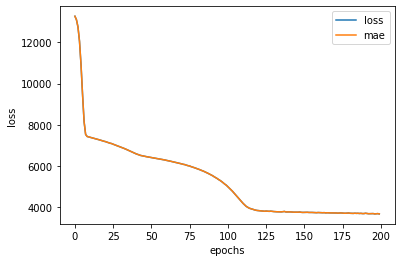

In [ ]:
# Plot history (also known as a loss curve or a training curve)

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")



## Preprocessing data (normalization and standarization)


In terms of scalling values, neural networks tend to prefer normalization.

If you are not sure on wich to use, you could try both and see wich performs better.

In [ ]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


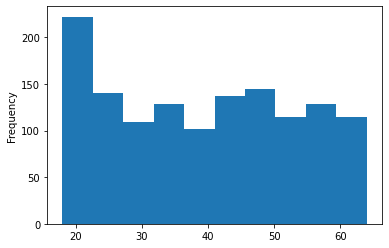

In [ ]:
X["age"].plot(kind='hist')

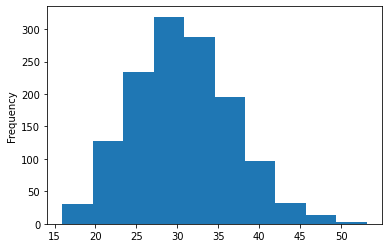

In [ ]:
X["bmi"].plot(kind='hist')

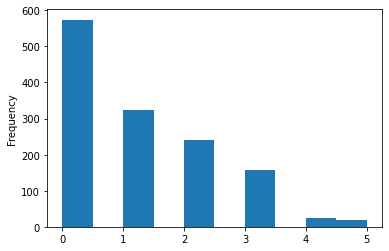

In [ ]:
X["children"].plot(kind='hist')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf 


# Read in the insurance dataframe

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer

ct = make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])

)

#Create X & y
X =  insurance.drop("charges",axis=1)
y = insurance["charges"]


# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [ ]:
# What does our data look like now?

X_train.loc[0], X_train_normal[0]

(age                19
 sex            female
 bmi              27.9
 children            0
 smoker            yes
 region      southwest
 Name: 0, dtype: object,
 array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ]))

In [ ]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

## Our data has been normalized and one hot encoded. Now lets build a neural network model

In [ ]:
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(1)                                         
])

# 2. Compile the model
insurance_model_4.compile(loss=["mae"],
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"]
                          )

# 3. Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=200)

In [ ]:
# Evaluate insurance model

insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 2668.2688 - mae: 2668.2688


[2668.268798828125, 2668.268798828125]

# Neural Network Classification in TensorFlow

A few types of classification problems:
* Binary Classification
* Multiclass Classification
* Multilabel Classification

## Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X,y = make_circles(n_samples,
                   noise=0.3,
                   random_state=42)

In [ ]:
# CheckOut the features
X 

array([[ 0.59171471,  0.43674853],
       [-0.45745002,  0.36160118],
       [-1.01069349,  0.83042101],
       ...,
       [-0.01985814, -1.02765007],
       [ 0.54269168, -1.11429774],
       [ 0.24539316,  1.01154823]])

In [ ]:
# CheckOut the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

Our data is a little hard to understand right now.. let's visualize it

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "Label":y})
circles

,X0,X1,Label
0,0.591715,0.436749,1
1,-0.457450,0.361601,1
2,-1.010693,0.830421,1
3,-0.871696,0.414073,1
4,0.488035,-0.872587,0
...,...,...,...
995,0.312050,0.696566,0
996,-1.069302,-0.485523,0
997,-0.019858,-1.027650,1
998,0.542692,-1.114298,0


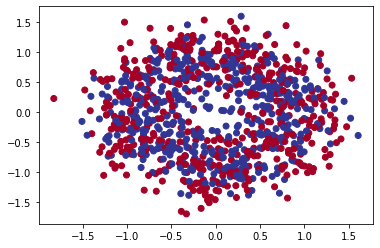

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

## Input and Output shapes

In [ ]:
# Check the shapes
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# Check the number of sanmples
len(X), len(y)

(1000, 1000)

In [ ]:
# View the first example of features and labels

X[0], y[0]

(array([0.59171471, 0.43674853]), 1)

## Steps in modelling

* Create o import a model
* Compile the model
* Fit the model
* Evaluate the model


In [ ]:
# Import TF
import tensorflow as tf
import numpy as np


In [ ]:

# Set random seed
tf.random.set_seed(42)

# 1. Create the model using Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
  ])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model

model_1.fit(X,y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 1ms/step - loss: 2.4716 - accuracy: 0.4730
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7222 - accuracy: 0.5050
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7028 - accuracy: 0.4970
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6963 - accuracy: 0.4940
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6944 - accuracy: 0.4920


In [ ]:
# Train longer

model_1.fit(X,y,epochs=200, verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 936us/step - loss: 0.6935 - accuracy: 0.5000


[0.6934647560119629, 0.5]

In [ ]:
# Adding a n extra layer

tf.random.set_seed(42)

# 1. Create a model, this time with 2 layers

model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)                               
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model

model_2.fit(X,y, epochs=100, verbose=0)


In [ ]:
# 4. Evaluate the model

model_2.evaluate(X,y)

32/32 [==============================] - 0s 849us/step - loss: 0.6933 - accuracy: 0.5000


[0.6933214068412781, 0.5]

## Improving our model

Lets look into our bag of tricjs to see how we can improve our model.

1. Create a model - We might to add more layers or increase the number of hidden units within a layer.
2. Compiling a model - here we might to choose a different optimization such as Adam instead of SGD.
3. Fitting a model - perhaps we might fot our model for more epochs.

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (3 layers)

model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, input_shape=(None,1)),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)                               
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model

model_3.fit(X,y, epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 2.2191 - accuracy: 0.5017
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7235 - accuracy: 0.4964
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4965
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.4914
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.4901
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6939 - accuracy: 0.5020
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.4942
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.4838
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.4999
Epoch 11/

In [ ]:
# 4. Evaluate the model
model_3.evaluate(X,y)

32/32 [==============================] - 0s 960us/step - loss: 0.6940 - accuracy: 0.5000


[0.6939969062805176, 0.5]

To visualize our model's predictions, lets create a function.
`plot_decision_boundary()` this function will:

* Take in a trained model, features (x) and labels (y)
* Create a meshgrid of the different X values.
* Make predictions across the meshgrid.
* Plot the predictions as well as a line between zones (where each unique class fall)

In [ ]:
def plot_decision_boundary(model, X, y):

  """
  Plots the decision boundary created by a model predicting on X.
  """

  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 0].min() - 0.1, X[:, 1].max() + 0.1
  xx,yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                      np.linspace(y_min, y_max, 100))
  
  # Create X value (ew're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  #make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")

    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)


  # Plot the decision boundary
  plt.contourf(xx,yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(), yy.max())    

doing multiclass classification


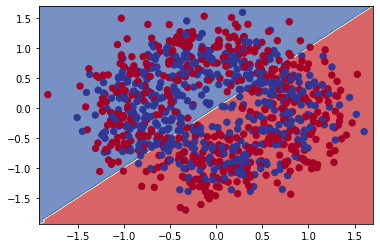

In [ ]:
# Check oout the predictions
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [ ]:
# Lets see if our model can be used for a regression problem...

tf.random.set_seed(42)

# Create some regression data

X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100, 5) # y = X + 10

# Split our gression data into trainning and test sets

X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]


# 1. Create the model (3 layers)

model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, input_shape=(None, 1)),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)                               
])

# 2. Compile the model
model_3.compile(loss=["mae"],
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the model

model_3.fit(tf.expand_dims(X_reg_train, axis=-1),y_reg_train, epochs=100, verbose=1)

Epoch 1/100
5/5 [==============================] - 1s 3ms/step - loss: 293.4841 - mae: 293.4841
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 260.5320 - mae: 260.5320
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 262.4440 - mae: 262.4440
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 256.9070 - mae: 256.9070
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 256.6043 - mae: 256.6043
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 257.7247 - mae: 257.7247
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 254.5781 - mae: 254.5781
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 253.0442 - mae: 253.0442
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 258.7201 - mae: 258.7201
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 257.2287 - mae: 257.2287
Epoch 11/100
5/5 [=====================

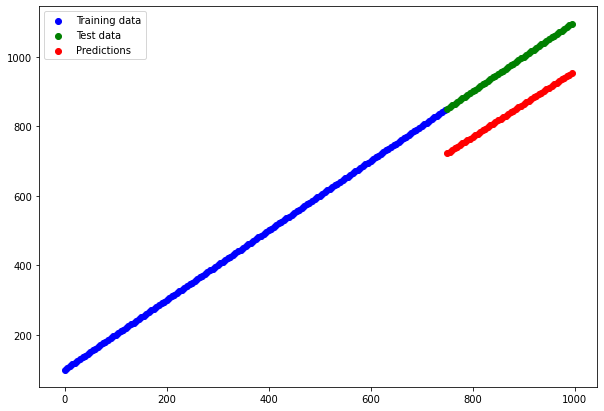

In [ ]:
# Make predictions

y_reg_preds = model_3.predict(tf.expand_dims(X_reg_test, axis=-1))


plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend()

## The missing piece: Non-linearity

In [ ]:
# Set the random seed
tf.random.set_seed(42)


# 1. Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)                               
])


# 2. Compile the model

model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model

history = model_4.fit(X,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2995 - accuracy: 0.4700
Epoch 2/100
32/32 [==============================] - 0s 992us/step - loss: 4.2023 - accuracy: 0.4740
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1228 - accuracy: 0.4740
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0098 - accuracy: 0.4740
Epoch 5/100
32/32 [==============================] - 0s 987us/step - loss: 3.9324 - accuracy: 0.4760
Epoch 6/100
32/32 [==============================] - 0s 962us/step - loss: 3.8826 - accuracy: 0.4770
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8008 - accuracy: 0.4840
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7662 - accuracy: 0.4860
Epoch 9/100
32/32 [==============================] - 0s 972us/step - loss: 3.6024 - accuracy: 0.4870
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.5558 - accuracy: 0.4840
E

doing binary classification


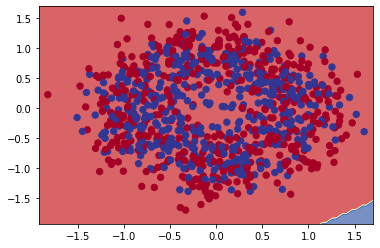

In [ ]:
# Check de decision boundary for our latest model

plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

## Lets try build our first NN with a non-linear activation function.

In [ ]:
# Random seed

tf.random.set_seed(42)


# 1. Create the model

model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)                               
])

# 2. Compile the model

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. fit the model
history = model_5.fit(X,y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 0s 1ms/step - loss: 4.2995 - accuracy: 0.4700
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2023 - accuracy: 0.4740
Epoch 3/100
32/32 [==============================] - 0s 973us/step - loss: 4.1228 - accuracy: 0.4740
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0098 - accuracy: 0.4740
Epoch 5/100
32/32 [==============================] - 0s 995us/step - loss: 3.9324 - accuracy: 0.4760
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8826 - accuracy: 0.4770
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8008 - accuracy: 0.4840
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7662 - accuracy: 0.4860
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.6024 - accuracy: 0.4870
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.5558 - accuracy: 0.4840
Epoch 11/100
32/3

In [ ]:
# Set seed
tf.random.set_seed(42)


# Create the model

model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")                               
])

# Compile the model

model_6.compile(loss="binary_crossentropy",
                optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# Fit the model
history = model_6.fit(X,y, epochs=300)

Epoch 1/300
32/32 [==============================] - 0s 1ms/step - loss: 0.6918 - accuracy: 0.5110
Epoch 2/300
32/32 [==============================] - 0s 1ms/step - loss: 0.6874 - accuracy: 0.5230
Epoch 3/300
32/32 [==============================] - 0s 1ms/step - loss: 0.6853 - accuracy: 0.5250
Epoch 4/300
32/32 [==============================] - 0s 1ms/step - loss: 0.6844 - accuracy: 0.5380
Epoch 5/300
32/32 [==============================] - 0s 1ms/step - loss: 0.6835 - accuracy: 0.5540
Epoch 6/300
32/32 [==============================] - 0s 1ms/step - loss: 0.6831 - accuracy: 0.5550
Epoch 7/300
32/32 [==============================] - 0s 1ms/step - loss: 0.6825 - accuracy: 0.5590
Epoch 8/300
32/32 [==============================] - 0s 1ms/step - loss: 0.6822 - accuracy: 0.5610
Epoch 9/300
32/32 [==============================] - 0s 1ms/step - loss: 0.6818 - accuracy: 0.5660
Epoch 10/300
32/32 [==============================] - 0s 1ms/step - loss: 0.6815 - accuracy: 0.5620
Epoch 11/

In [ ]:
# Evaluate the model

model_6.evaluate(X,y)

32/32 [==============================] - 0s 933us/step - loss: 0.6515 - accuracy: 0.6140


[0.6514587998390198, 0.6140000224113464]

doing binary classification


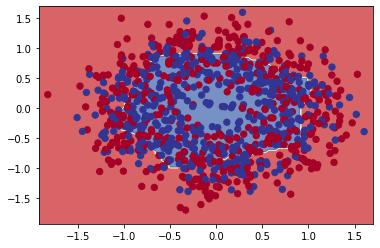

In [ ]:
#Visulize model predictions

plot_decision_boundary(model_6,X,y)

In [ ]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

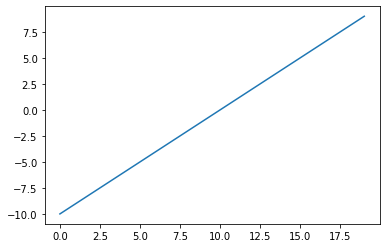

In [ ]:
# Visualize it
plt.plot(A)


In [ ]:
# Lets start by replcating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))

def sigmoid(x):
  return 1 / (1 + tf.exp(-x))


sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

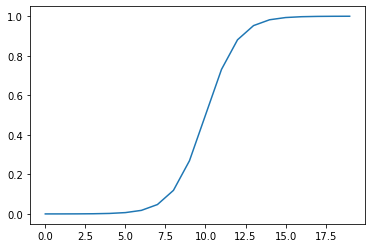

In [ ]:
# Plot our toy sensor transformed by sigmoid

plt.plot(sigmoid(A))

In [ ]:
# Lets recreate RELU function

def relu(x):
  return tf.maximum(0,x)


# Passs our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

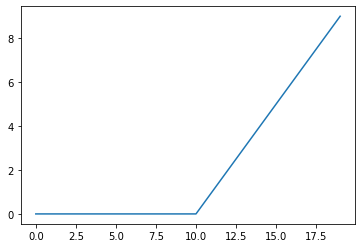

In [ ]:
plt.plot(relu(A))

In [ ]:
# Lets try the linear activation function

tf.keras.activations.linear(A) # The linear function just return the same array

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

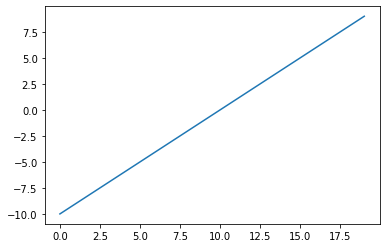

In [ ]:
plt.plot(tf.keras.activations.linear(A))

## Evaluating and improving our classification

So far we have been training and testing on the same dataset.
However, in ML this is basically a sin.
Lets create a training and test set

In [ ]:
# Check how many examples we have
len(X)

1000

In [ ]:
# Split into train and test sets

X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:],y[800:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [ ]:
# Lets re-create a model to fit on the training data and evaluate on the testing data

# Set random seed
tf.random.set_seed(42)

# 1. Create the model

model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")                               
])

# 2. Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# 3. Fit the model
history = model_8.fit(X_train,y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6861 - accuracy: 0.5462
Epoch 2/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6823 - accuracy: 0.5550
Epoch 3/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6811 - accuracy: 0.5675
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6798 - accuracy: 0.5562
Epoch 5/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6784 - accuracy: 0.5562
Epoch 6/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6799 - accuracy: 0.5600
Epoch 7/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6776 - accuracy: 0.5675
Epoch 8/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6759 - accuracy: 0.5700
Epoch 9/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5713
Epoch 10/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6754 - accuracy: 0.5688
Epoch 11/25
25/25 [

In [ ]:
# 4. Evaluate the model

model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.6752 - accuracy: 0.5500


[0.6751681566238403, 0.550000011920929]

doing binary classification
doing binary classification


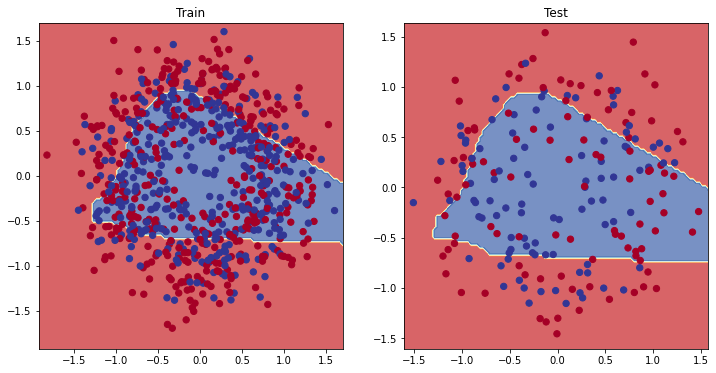

In [ ]:
# Plot the decision boundaires

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8,X_test,y_test)
plt.show();

## Plot the loss (or training) curves

In [ ]:
# Convert the history object into a DF

pd.DataFrame(history.history)

,loss,accuracy
0,0.686088,0.54625
1,0.682345,0.55500
2,0.681124,0.56750
3,0.679811,0.55625
4,0.678375,0.55625
5,0.679858,0.56000
6,0.677638,0.56750
7,0.675903,0.57000
8,0.676544,0.57125
9,0.675423,0.56875


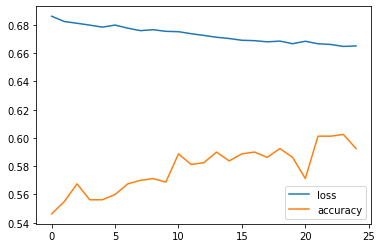

In [ ]:
# Plot the loss curves 
pd.DataFrame(history.history).plot()

## For many problems, the loss function going down means the model is improving (the predictions it making are getting ground truth labels)

## Finding the best learning rate

To find the ideal learning rate (the larning rate where the loss decreases the most during training) we are going to use the following steps:

* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your model *while* its training.
* Another model (we could uste the same one as above, but we are practicing building models here)
* A modified loss curve plot.

In [ ]:
# Set random

tf.random.set_seed(42)

# Create a model
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")                               
])

# Compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch/20))

# Fit the model (passing ls_scheduler callback)

history_9 = model_9.fit(X_train,
                        y_train,
                        epochs=100,
                        callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6968 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6961 - accuracy: 0.5063 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6952 - accuracy: 0.5113 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6944 - accuracy: 0.5088 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.5138 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6927 - accuracy: 0.5138 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6918 - accuracy: 0.5150 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6909 - accuracy: 0.5200 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss:

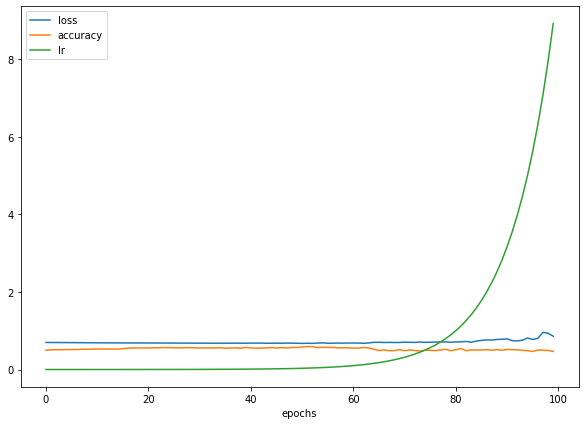

In [ ]:
# Checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10,7), xlabel="epochs")

Text(0.5, 1.0, 'Learning rate vs Loss')

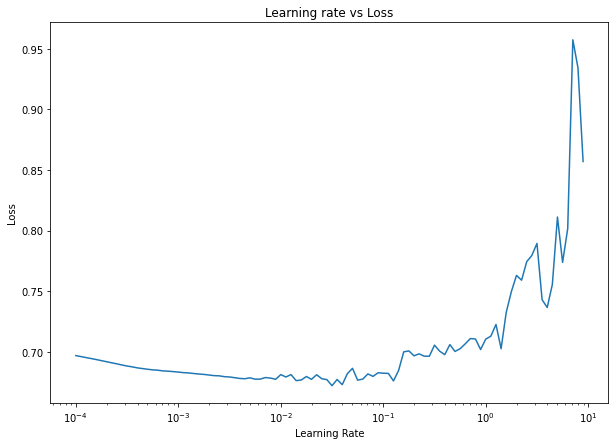

In [ ]:
# plot the learning rate vs the loss

lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

In [ ]:
# example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [ ]:
# Lets try using a higher *ideal* learning rate with the same model

# Set random set
tf.random.set_seed(42)

# Create model 10

model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model

model_10.compile(loss="binary_crossentropy",
                 optimizer= tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=["accuracy"])

# Fit the model
history_10 = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6862 - accuracy: 0.5362
Epoch 2/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6830 - accuracy: 0.5663
Epoch 3/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6810 - accuracy: 0.5462
Epoch 4/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6787 - accuracy: 0.5763
Epoch 5/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6791 - accuracy: 0.5600
Epoch 6/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6809 - accuracy: 0.5688
Epoch 7/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6741 - accuracy: 0.5638
Epoch 8/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6735 - accuracy: 0.5813
Epoch 9/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6729 - accuracy: 0.5913
Epoch 10/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6718 - accuracy: 0.5813
Epoch 11/20
25/25 [

In [ ]:
# Evaluate model
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.6620 - accuracy: 0.5900


[0.6619537472724915, 0.5899999737739563]

In [ ]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.6752 - accuracy: 0.5500


[0.6751681566238403, 0.550000011920929]

doing binary classification
doing binary classification


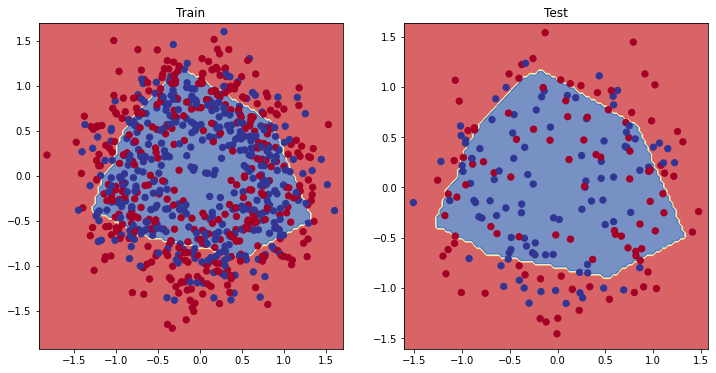

In [ ]:
# Plot the decision boundaries

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10, X_test, y_test)
plt.show()

## More classification evaluation methods

Alongside visualizing our models results as much as possible, there are a handful of other classification evaluation. ethods & metrics you should be familiar with:

* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from scikit-learn)

In [ ]:
# Check the accuracy of pur model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}% ")

7/7 [==============================] - 0s 4ms/step - loss: 0.6620 - accuracy: 0.5900
Model loss on the test set: 0.6619537472724915
Model accuracy on the test set: 59.00% 


## How about a confusion matrix?

In [ ]:
# Creat a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
#confusion_matrix(y_test,y_preds)
confusion_matrix(y_test,tf.round(y_preds))

array([[53, 48],
       [34, 65]])

In [ ]:
y_test[:10], y_preds[:10]

(array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0]), array([[0.5725823 ],
        [0.6596983 ],
        [0.55385846],
        [0.569506  ],
        [0.6535146 ],
        [0.5437266 ],
        [0.48792133],
        [0.48492327],
        [0.632509  ],
        [0.5469962 ]], dtype=float32))

## Ooops... looks like our predictions array has come out in **prediction probability** form... the standard output from the sigmoid (or softmax) activation functions.

In [ ]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.]], dtype=float32)>

In [ ]:
# Create a confusion matrix

confusion_matrix(y_test, tf.round(y_preds))

array([[53, 48],
       [34, 65]])

## A best version of the confusion matrix

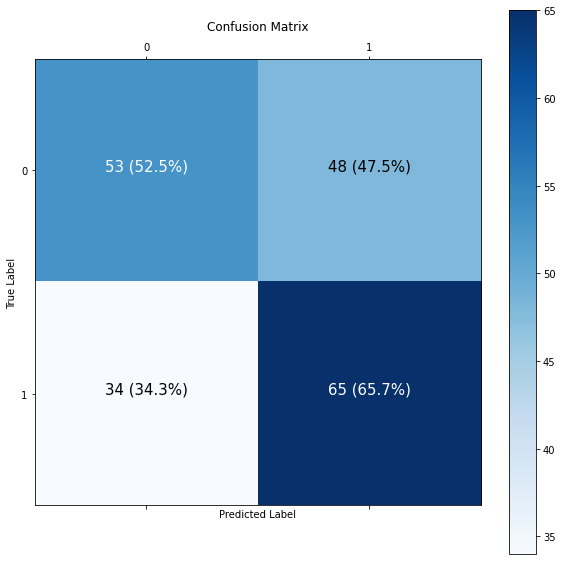

In [ ]:
import itertools

figsize = (10,10)

# Create the confusion matrix

cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis] # normalize our confusion
n_classes = cm.shape[0]

# Lets prettify it
fig, ax = plt.subplots(figsize=figsize)

# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)

fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])


# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

#

# Set the threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j,i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i,j] > threshold else "black",
           size=15)

## Working with a larger example (Multiclass Classification)

When you have more than 2 classes as an option, it's known as **multi-class classification.**

* This means if you have 3 different classes, it's multi-class classification.
* It also means if you have 100 different classes, it's multi-class classification.

To practice multi-class classification, we are going to build a neural network to classify images of differents items of clothing.



In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
# Show the first training example

print(f"Training sample:\n{train_data[45731]}\n")
print(f"Training label:\n{train_labels[45731]}\n")

Training sample:
[[  0   0   0   0   1   0   0   0  51  79   0   0   0   0   0   0   0   0
   59   0   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0 123 168 155 198 162  79   0   0   0   3  53 155
  189 134 130  46   0   0   1   0   0   0]
 [  0   0   0   1   0 107 168 148 137 159 209 202 150  41  78 187 211 213
  147 134 160 181  41   0   1   0   0   0]
 [  0   0   4   0  11 163 138 136 146 154 184 174 187 190 198 197 187 180
  145 133 151 132 123   0   0   0   0   0]
 [  0   0   2   0  98 182 161 182 174 141 168 202 181 184 191 184 191 174
  158 144 137 133 161  27   0   3   0   0]
 [  0   0   0   0 144 168 163 182 143 151 135 141 178 205 188 195 163 163
  178 130  91 163 142  45   0   2   0   0]
 [  0   0   0   0 168 171 139 187 135 139 132 158 146 212 200 184 190 137
  162 145 103 131 146  97   0   0   0   0]
 [  0   0   0   7 160 177 129 187 143 150 135 132 124 185 187 143 164 175
  164 134  94 148 155 112   0   0   0   0]
 [  0   0   0  41 179 193 176 183 163 151 131 1

In [ ]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

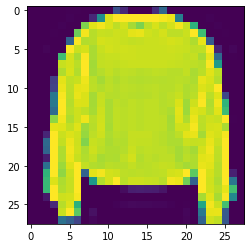

In [ ]:
# Plot a single sample

import matplotlib.pyplot as plt
plt.imshow(train_data[7])

In [ ]:
# check out samples label
train_labels[7] # 2 = 'Pullover'

2

In [ ]:
# create a small list so we can index onto our training labels so they are human-readable

class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'Shirt')

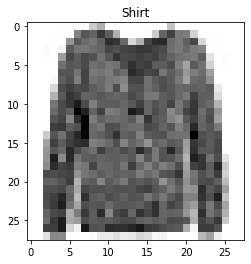

In [ ]:
# Plot an example image and its label
index_of_choice = 45731
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

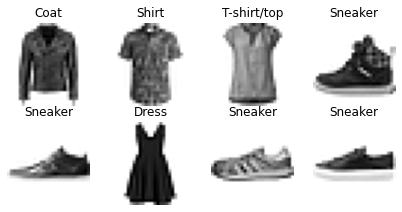

In [ ]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(8):
  ax = plt.subplot(4,4,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multi-class classification model
* Input shape = 28 x 28 (the shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
  * If your labels are one-hot encoded, use CategoricalCrossentropy()
  * If your labels are integer form use SparseCategoricalCrossentropy()
* Output layer activation = Softmax(not sigmoid)

In [ ]:
# our data needs to be flattened (from 28 * 28 to None,784)
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

(None, 784)

In [ ]:
28 * 28

784

In [ ]:
from sklearn.utils.extmath import softmax
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4,activation='relu'),
  tf.keras.layers.Dense(4,activation="relu"),
  tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)                                
])

# 2. Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # If you want to provide labels as integers, please use SparseCategoricalCrossentropy loss
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])


# 3. Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

In [ ]:
# check the model summary
model_11.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check the min and max values of training data
train_data.min(), train_data.max()

(0, 255)

## Neural networks prefer data to be scaled (or normalized), this means they like to have numbers in tensors they try to find patterns between 0 and 1.

In [ ]:
# We can get our training and testing data between 0 & 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [ ]:
# Create a model with normalized data

# Set random seed
tf.random.set_seed(42)

# Create a model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")                                
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer= tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
norm_history = model_12.fit(train_data_norm,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

> **Note:** Neural networks tend to prefer data in numerical form as well as scaled/normalized (numers between 0 & 1)

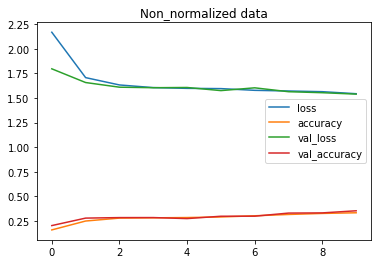

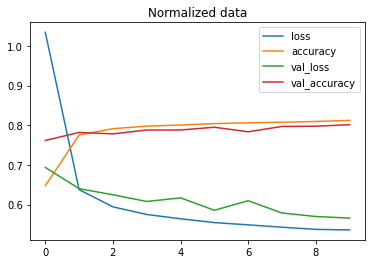

In [ ]:
import pandas as pd

# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non_normalized data")

# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")

> **Note:** The same model with even *slightly* different data can produce *dramatically* different results. So when you are comparing models, it's important to make sure you are comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture.)

## Finding the ideal learning rate

In [ ]:
from gc import callbacks
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")                                
])

# Compile model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data_norm, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

Text(0.5, 1.0, 'Finding the ideal learning rate')

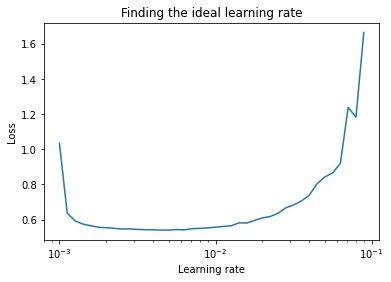

In [ ]:
# Plot the learning rate decay curve

import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [ ]:
# Let's re-fit the model with the ideal learning rate

#Set randmo seed
tf.random.set_seed(42)

# Create model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")                                
])

# Compile model

model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer= tf.keras.optimizers.Adam(lr=0.001),
                 metrics=["accuracy"])

# Fit the model
history_14 = model_14.fit(train_data_norm,
                          train_labels,
                          epochs=20,
                          validation_data=(test_data_norm, test_labels))

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy: 0.7836
Epo

## Evaluating our multiclass classification model

To evaluate our multi-class classification model we could:

* Evaluate its performance using other classification metrics (such as a confusion matrix)

* Asses some of its predictions (through visualizations).
* Improve its results (by training it for longer or changing the architecture).
* Save and export it for use in an application.

Let's go through the top 2...

In [ ]:
# Create a confusion matrix

import itertools
from sklearn.metrics import confusion_matrix



def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=15):

  # Create the confusion matrix

  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis] # normalize our confusion
  n_classes = cm.shape[0]

  # Lets prettify it
  fig, ax = plt.subplots(figsize=figsize)

  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)

  fig.colorbar(cax)


  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])


  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i,j] > threshold else "black",
            size=text_size)

In [ ]:
class_names

In [ ]:
# Make some predictions

y_probs = model_14.predict(test_data_norm) # probs is short for prediction probability

# View the first 5 predictions

y_probs[:5] # El resultado de la prediccion es los valores de las posibles clases de la imagen,

array([[8.56299753e-11, 3.53615629e-13, 2.66337556e-05, 4.63562024e-08,
        5.09498605e-05, 9.61192474e-02, 8.17780403e-08, 9.18688551e-02,
        4.06052778e-03, 8.07873666e-01],
       [3.42785552e-06, 1.28992649e-16, 9.59891498e-01, 2.05162564e-07,
        1.53292371e-02, 2.45320095e-13, 2.41428725e-02, 1.13834485e-28,
        6.32718089e-04, 4.47896404e-08],
       [6.10630595e-05, 9.96576726e-01, 4.38669758e-08, 3.34058981e-03,
        1.32494861e-05, 1.43831603e-21, 8.27906115e-06, 7.32374630e-18,
        5.48116041e-08, 4.92251402e-14],
       [7.50314357e-05, 9.90536869e-01, 4.25285322e-07, 9.22318175e-03,
        1.36231421e-04, 1.82760903e-18, 2.68082422e-05, 4.81248308e-14,
        1.45215904e-06, 2.22114601e-11],
       [7.21899569e-02, 1.54957536e-06, 2.55668938e-01, 1.03631355e-02,
        4.35413495e-02, 1.10693023e-13, 6.16930187e-01, 6.75438989e-23,
        1.30491622e-03, 1.21404065e-09]], dtype=float32)

> **Note:** Remember to make predictions on the same kind of data your model was trained on (e.g. if your model was trained on normalized data, you will want to make predictions on normalized data.)

In [ ]:
#Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels

y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
# Creat a confussion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred= y_preds)



array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

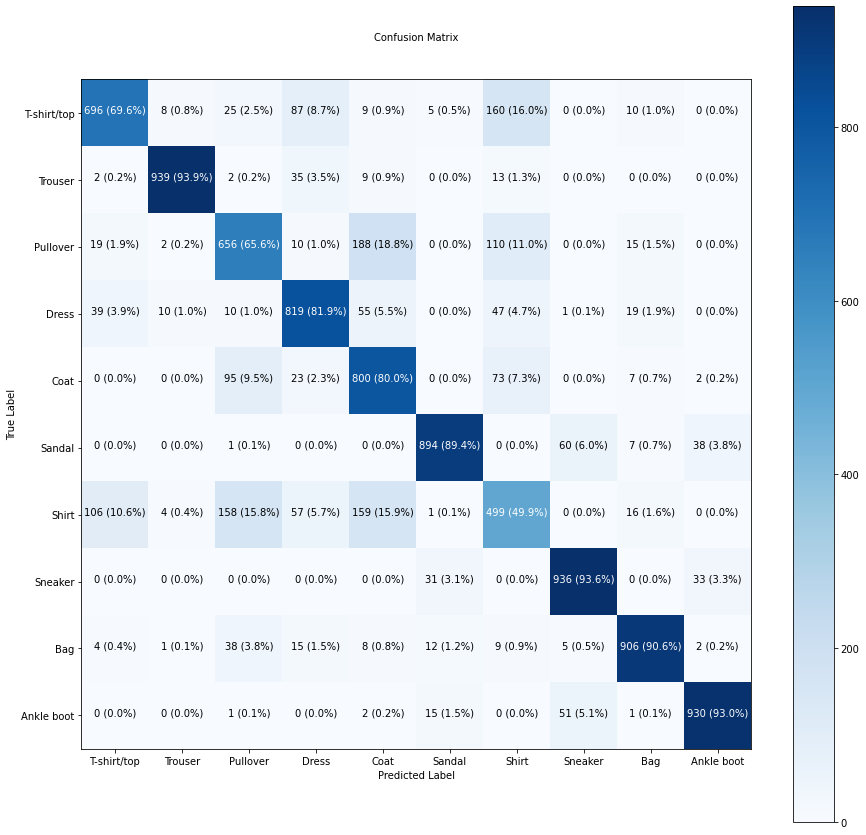

In [ ]:
# Make a prettier confusion matrix

make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15,15),
                      text_size=10)

> **Note:** Often when working with images and other forms of visual data, it's a good ideas to visualize as much as possible to develop a further undertanding of the data and the inputs and outputs of your models.

In [ ]:
import random

def plot_random_image(model,images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label.
  """
  # Set up random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the predictions is right or worng
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color = color)





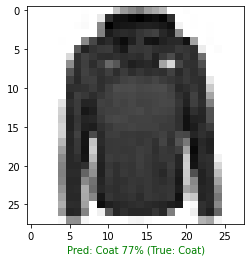

In [ ]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)

## What patterns is our model learning?

In [ ]:
# Find the layers of our most recen model?

model_14.layers

In [ ]:
# Extract a particular layer

model_14.layers[1]

In [ ]:
# Get the patterns of a layer in our network
weigths, biases = model_14.layers[1].get_weights()

# shapes
weigths, weigths.shape

(array([[ 0.7150263 , -0.06077093, -0.99763095, -1.0484313 ],
        [ 0.2773212 , -0.471554  , -0.52916455,  0.02329255],
        [ 0.7752433 ,  0.5402759 , -1.128857  , -0.7426156 ],
        ...,
        [-0.3945342 ,  0.47628632, -0.2264153 ,  0.2550593 ],
        [-0.40515798,  0.61810046,  0.23928414, -0.50387603],
        [ 0.23884593,  0.11606961, -0.12131374,  0.04352392]],
       dtype=float32), (784, 4))

In [ ]:
28 * 28 # input images shape

784

In [ ]:
model_14.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 4)                 3140      
                                                                 
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Bias and biases shapes

biases, biases.shape

(array([ 2.4485964e-02, -6.1471871e-04, -2.7230152e-01,  8.1124878e-01],
       dtype=float32), (4,))

> Every neunrons has a bias vector. Each of these is paired with a weights matrix. The bias vector get initialized as zeros (at least in the case of a Tensorflow Dense Layer). The bias vector dictates **how much the patterns within the corresponding weights matrix should influence the next layer**.

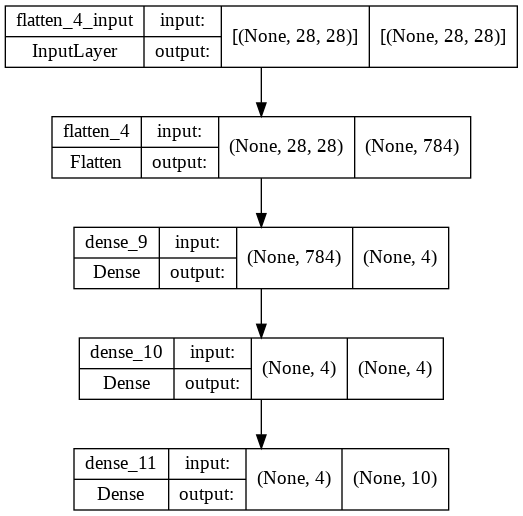

In [ ]:
# Lets check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)




# Introduction to Computer vision with Tensorflow

Computer vision is the practice of writing algorithms wich can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Get data

The images we are working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/dansbecker/food-101

However we have modified it to only use two classes (pizza & steak) using the image data modification notebook:
https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

> **Note:** We start with smaller dataset so we can experiment quickly and figure what works (or better yet what doesn't work) before scaling up.

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#Unzip the downlaed file

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()


--2022-07-14 16:39:54--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 74.125.24.128, 142.251.10.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   220MB/s    in 0.5s    

2022-07-14 16:39:55 (220 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data

A very crucial step at the beginning of any machine learning project is becoming one with the data.
And for a computer vision project... this usually means visualizing many samples of your data.

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/ 

pizza  steak


In [4]:
!ls pizza_steak/train/steak/ 

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os 

# Walk through

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [6]:
# Another way to find out how many images are in a folder

num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

## To visualize our images, first lets get the class names programmatically

In [7]:
# Gte the classnames programmatically

import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")

class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # created a list of class_names from subdirectory

print(class_names)

['pizza' 'steak']


In [8]:
# Let's visualize the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we will view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # Show the shape of the image

  return img





['1714605.jpg']
Image shape: (512, 512, 3)


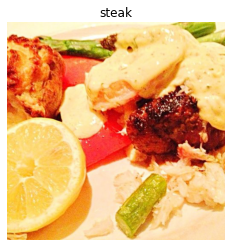

In [9]:
# View random image from the training dataset

img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")


['3742272.jpg']
Image shape: (512, 512, 3)


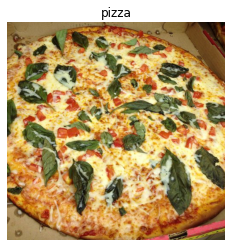

In [10]:
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [11]:
# The images we have imported and plotted are actually giant arrays/tensors of different pixel values
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[113,  81,  40],
        [127,  95,  54],
        [125,  96,  54],
        ...,
        [ 34,  23,  17],
        [ 33,  17,  17],
        [ 29,  10,  12]],

       [[118,  87,  43],
        [125,  94,  50],
        [126,  97,  53],
        ...,
        [ 26,  17,  10],
        [ 28,  14,  13],
        [ 26,  10,  11]],

       [[119,  88,  44],
        [119,  88,  44],
        [125,  94,  50],
        ...,
        [ 15,  10,   4],
        [ 20,   9,   7],
        [ 21,   7,   7]],

       ...,

       [[150, 128,  78],
        [153, 131,  81],
        [155, 133,  83],
        ...,
        [ 63,  52,  30],
        [ 64,  53,  31],
        [ 64,  53,  31]],

       [[152, 130,  80],
        [154, 132,  82],
        [154, 132,  82],
        ...,
        [ 63,  52,  30],
        [ 63,  52,  30],
        [ 63,  52,  30]],

       [[150, 128,  78],
        [151, 129,  79],
        [152, 130,  81],
        ...,
        [ 63,  52,  3

In [12]:
# View the image shape
img.shape # returns width, height, colour channels



(512, 512, 3)

> **Note:** As we have discussed before, many machine learnings models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one the most common preprocessing steps for working with images is to **scale** (also referred to as **normalize**) their pixel values by dividing the image arrays by 255. (since 255 is the maximum pixel value)

In [13]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.44313725, 0.31764706, 0.15686275],
        [0.49803922, 0.37254902, 0.21176471],
        [0.49019608, 0.37647059, 0.21176471],
        ...,
        [0.13333333, 0.09019608, 0.06666667],
        [0.12941176, 0.06666667, 0.06666667],
        [0.11372549, 0.03921569, 0.04705882]],

       [[0.4627451 , 0.34117647, 0.16862745],
        [0.49019608, 0.36862745, 0.19607843],
        [0.49411765, 0.38039216, 0.20784314],
        ...,
        [0.10196078, 0.06666667, 0.03921569],
        [0.10980392, 0.05490196, 0.05098039],
        [0.10196078, 0.03921569, 0.04313725]],

       [[0.46666667, 0.34509804, 0.17254902],
        [0.46666667, 0.34509804, 0.17254902],
        [0.49019608, 0.36862745, 0.19607843],
        ...,
        [0.05882353, 0.03921569, 0.01568627],
        [0.07843137, 0.03529412, 0.02745098],
        [0.08235294, 0.02745098, 0.02745098]],

       ...,

       [[0.58823529, 0.50196078, 0.30588235],
        [0.6       , 0.51372549, 0.31764706],
        [0.60784314, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set seed 
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called scaling/normalization)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Import data from directories and turn it into batches

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)


# Build a CNN model (same as the Tiny VGG on the CNN explainer website)

model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224,224,3)),
  tf.keras.layers.Conv2D(10,3,activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10,3, activation="relu"),
  tf.keras.layers.Conv2D(10,3,activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")                                                     

])

# Compile our CNN

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data), # len train_data = 47 | 1500 images / 32 batches = 47 | 32 batches of 47 images each one
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 26s 208ms/step - loss: 0.6426 - accuracy: 0.6240 - val_loss: 0.5220 - val_accuracy: 0.7240
Epoch 2/5
47/47 [==============================] - 9s 191ms/step - loss: 0.4588 - accuracy: 0.7813 - val_loss: 0.3460 - val_accuracy: 0.8660
Epoch 3/5
47/47 [==============================] - 9s 194ms/step - loss: 0.3970 - accuracy: 0.8267 - val_loss: 0.3215 - val_accuracy: 0.8640
Epoch 4/5
47/47 [==============================] - 9s 195ms/step - loss: 0.3675 - accuracy: 0.8413 - val_loss: 0.3399 - val_accuracy: 0.8700
Epoch 5/5
47/47 [==============================] - 9s 191ms/step - loss: 0.3291 - accuracy: 0.8680 - val_loss: 0.2929 - val_accuracy: 0.8760


In [15]:
# Get model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Using the same model as before
Lets replicate the model we have built in a previous section to see if it works with our image data.

In [16]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TF playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224,224,3)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")

])

# compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer= tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch = len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 183ms/step - loss: 1.0320 - accuracy: 0.5020 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 206ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 177ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 194ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 179ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [17]:
# Get summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


> Despite having 20x more parameters than our CNN (model_1), model_2 performs terribly... Lets try to improve it

In [18]:
# Set the random seed
tf.random.set_seed(42)

# Create the model (same as above but lest step it up a notch)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224,224,3)),
  tf.keras.layers.Dense(100,activation="relu"),
  tf.keras.layers.Dense(100,activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")                               
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer= tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch = len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 190ms/step - loss: 2.4267 - accuracy: 0.6653 - val_loss: 0.5815 - val_accuracy: 0.6880
Epoch 2/5
47/47 [==============================] - 8s 180ms/step - loss: 0.7854 - accuracy: 0.6980 - val_loss: 0.8006 - val_accuracy: 0.6100
Epoch 3/5
47/47 [==============================] - 10s 209ms/step - loss: 0.5438 - accuracy: 0.7693 - val_loss: 0.4569 - val_accuracy: 0.7720
Epoch 4/5
47/47 [==============================] - 8s 178ms/step - loss: 0.7650 - accuracy: 0.7307 - val_loss: 0.6612 - val_accuracy: 0.6880
Epoch 5/5
47/47 [==============================] - 8s 180ms/step - loss: 0.5836 - accuracy: 0.7473 - val_loss: 0.4715 - val_accuracy: 0.7600


In [19]:
# Get model summary
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


> **Note:** You can think of trainable parameters as **patterns a model can learn from data**. Intuitively, you might think more is better. And in lots of case, it is. But in this case, the difference here is the 2 different styles of model we are using. Where a series of dense layers has a number of different learnable parameters connected with each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in a image**. So even though these are less learnable parameters in our convolutional neural network, these are often more helpful in dechiphering between **features** in an image.

In [20]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Binary Classification: Let's break it down

1. Become one with the data. (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scalling/normalizing & turning our data into batches).
3. Created a model (start with a baseline).
4. Fit the model.
5. Evaluate the model.
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with the data

['3047807.jpg']
Image shape: (512, 512, 3)
['3628930.jpg']
Image shape: (512, 512, 3)


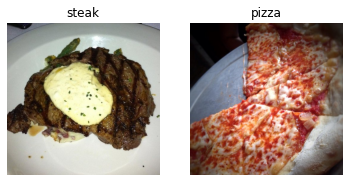

In [21]:
# Visualize data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepara it for a model)

In [22]:
# Define directory dataset paths

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test"

> Our next step is to turn our data into **batches**.
A batch is a small subset of data. Rather than look at all ~10000 images at one time, a model night only look at 32 at a time.

It does this for a couple of reasons:
1. 10000 images (or more)  might not fit into the memory of oyur processor (GPU).
2. Trying to learn the patterns in 10000 images in one hit could result in the model not being able to learn very well.



In [23]:
# Create train and test data generatoes and rescale the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [24]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # Target directory of images
                                               target_size=(224,224), # Target size of images (height, width)
                                               class_mode="binary", # type of data you are working with
                                               batch_size=32) # size of minibatches to load data into

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [25]:
# Get a sample of a train data batch

images, labels = train_data.next() # get the "next" batch of images/labels in 'train_data'
len(images), len(labels)

(32, 32)

In [26]:
# How many batches are there?
len(train_data) # 1500 (images) / 32 = 47 batches of 32 images

47

In [27]:
# Get the first two images

images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [28]:
images[7].shape

(224, 224, 3)

### 3. Create a CNN model (start with a baseline)

A baseline is a relative simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

> **Note:** In deep learning there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to satrt with something simple and see if it works on your data and then introduce complexity as required (e.g look at wich current model is performing best in the field for your problem)

In [29]:
# Make the creating of our model a little easier

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation 
from tensorflow.keras import Sequential

In [30]:
# Create the model (this will be our baseline, a layer convulational neural network)
model_4 = Sequential([
  Conv2D(filters=10, # filters is the number of sliding windows going across an input (higher = more complex model)
         kernel_size=3, # the size of the sliding window going across an input
         strides=1, # the size of the step the sliding window takes across an input
         padding="valid", # If "same", output shape is same as input shape, if "valid",output shape gets compressed
         activation="relu",
         input_shape=(224,224,3)), # Input layer (specify input shape)
  Conv2D(10,3,activation="relu"),
  Conv2D(10,3, activation="relu"),
  Flatten(),
  Dense(1,activation="sigmoid") # output layer (working with binary classification so only 1 output neuron)                              
])

In [31]:
# compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [32]:
# Get a summary of the model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [33]:
# Check the lenghts of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [34]:
# Fit the model
history_4 = model_4.fit(train_data, # this is a combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data= test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 16s 323ms/step - loss: 1.7205 - accuracy: 0.6233 - val_loss: 0.4840 - val_accuracy: 0.8040
Epoch 2/5
47/47 [==============================] - 14s 298ms/step - loss: 0.4517 - accuracy: 0.8047 - val_loss: 0.4128 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 14s 298ms/step - loss: 0.3587 - accuracy: 0.8540 - val_loss: 0.3871 - val_accuracy: 0.8180
Epoch 4/5
47/47 [==============================] - 14s 294ms/step - loss: 0.2858 - accuracy: 0.8867 - val_loss: 0.3814 - val_accuracy: 0.8340
Epoch 5/5
47/47 [==============================] - 15s 310ms/step - loss: 0.1613 - accuracy: 0.9473 - val_loss: 0.3929 - val_accuracy: 0.8320
